# Analysis RRT

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preparation of the information

In [38]:
df = pd.read_csv("../../results/rrt.csv", index_col=False)
df["totalTime"] = df["time1"] + df["time2"]
df["totalTimePrun"] = df["time1prun"] + df["time2prun"]
df["pickPose"] = df["pickPose"].map(str)
pose = {1: "Up pose", 2: "Lateral non-front pose", 3: "Lateral front pose"}

df1 = df.loc[df.loc[:,"pickPose"] == 1,:]
df2 = df.loc[df.loc[:,"pickPose"] == 2,:]
df3 = df.loc[df.loc[:,"pickPose"] == 3,:]
dfList = [df1, df2, df3]

## Pre-analysis

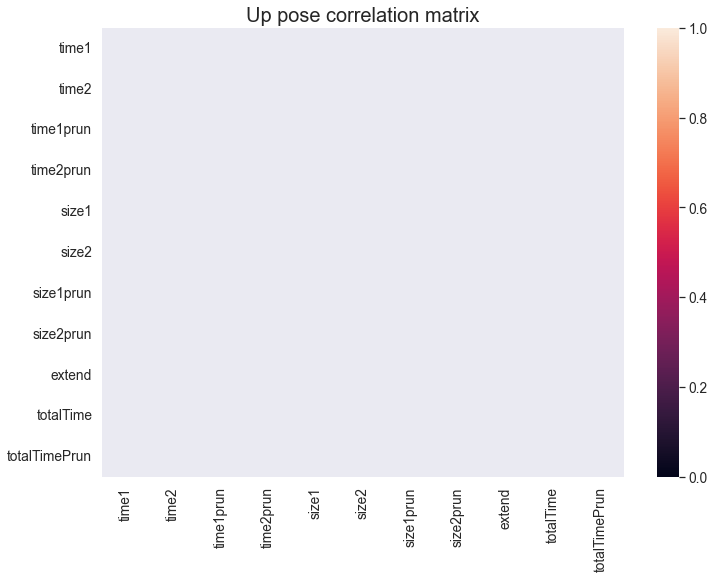

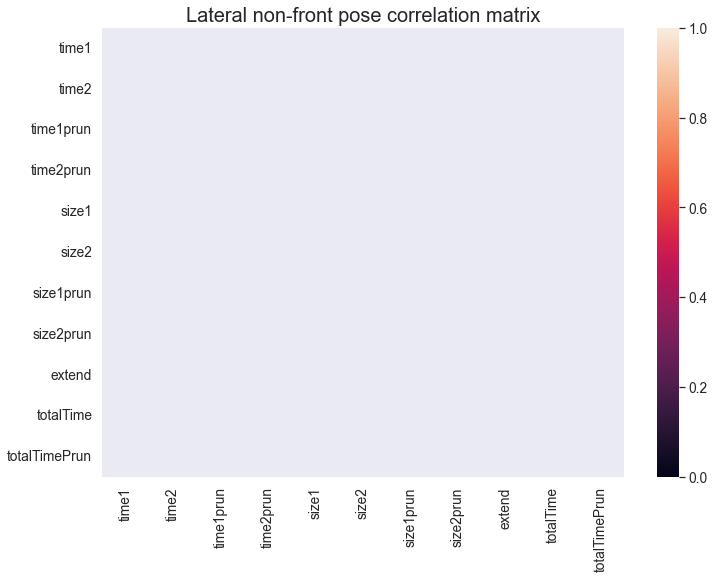

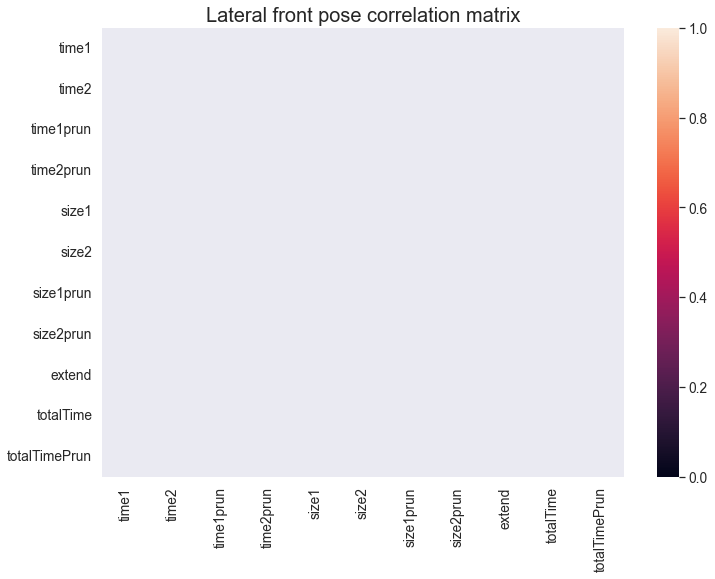

In [50]:
for i,data in enumerate(dfList):
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    corr = data.corr(method="pearson")
    
    plt.figure()
    sns.set(font_scale = 1.25)
    fig = sns.heatmap(corr, vmin=0, vmax=1)
    fig.axes.set_title(pose[i+1] + " correlation matrix", fontsize = 20)
    
    data.describe()

## Plots of descriptive analysis
Plots will be performed based on the extend parameter and compared variable to variable.

### Boxplots compared for extend for each of the variables

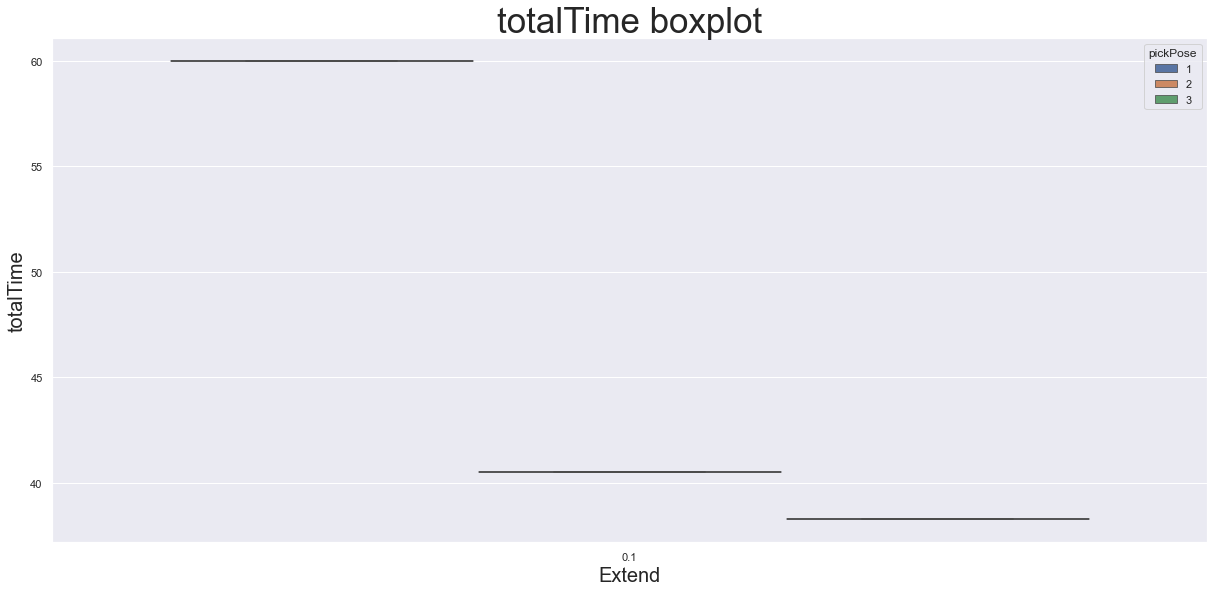

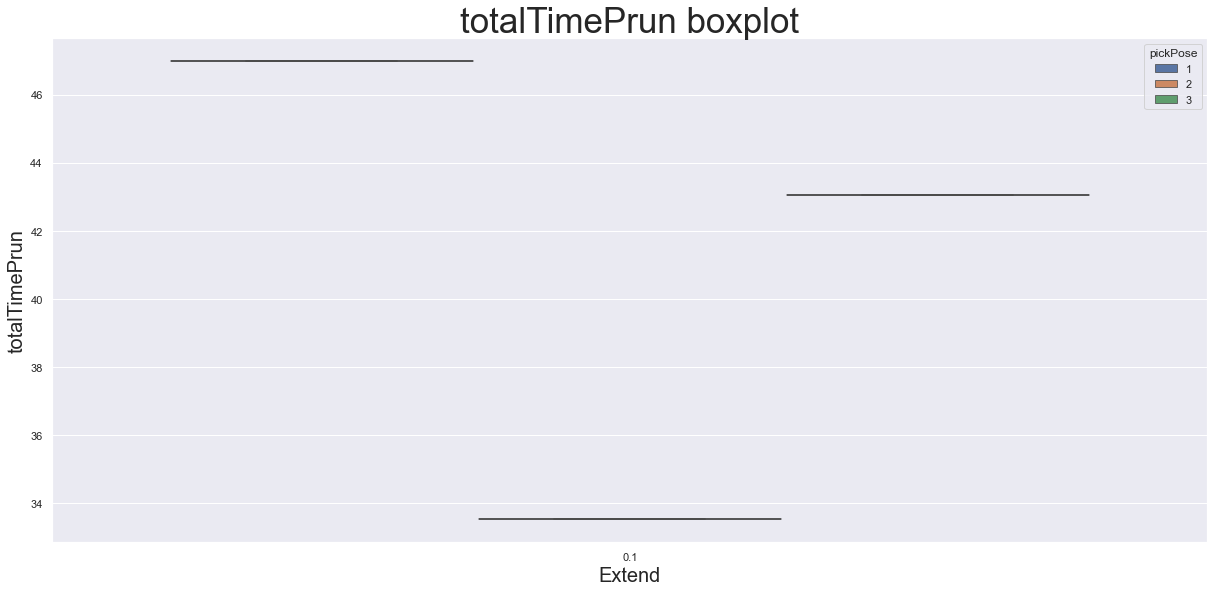

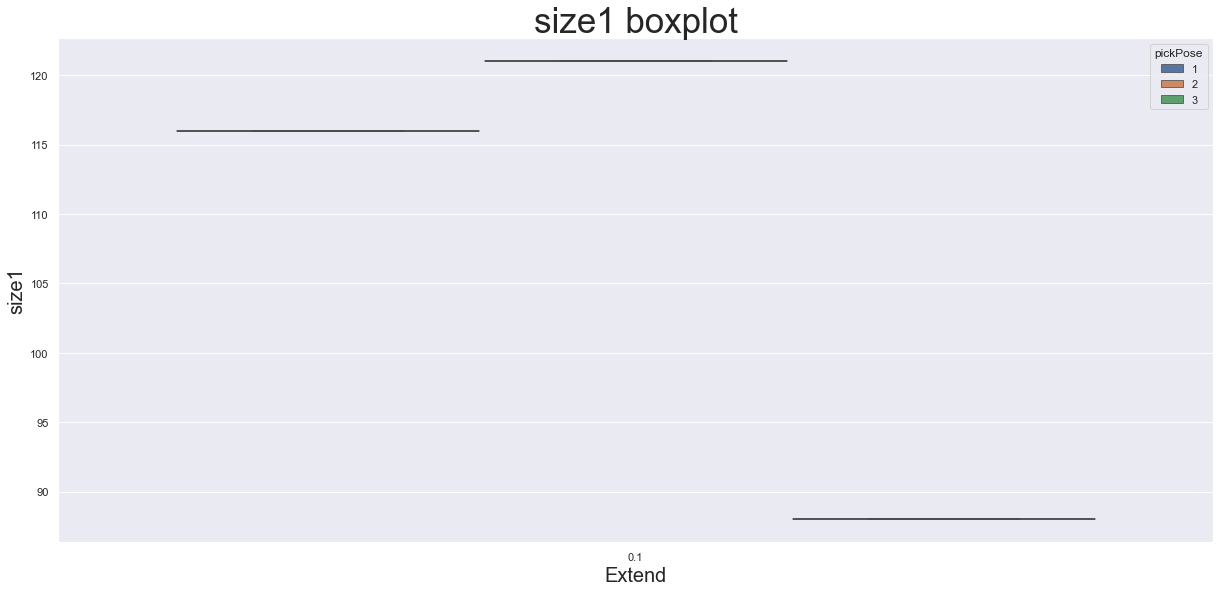

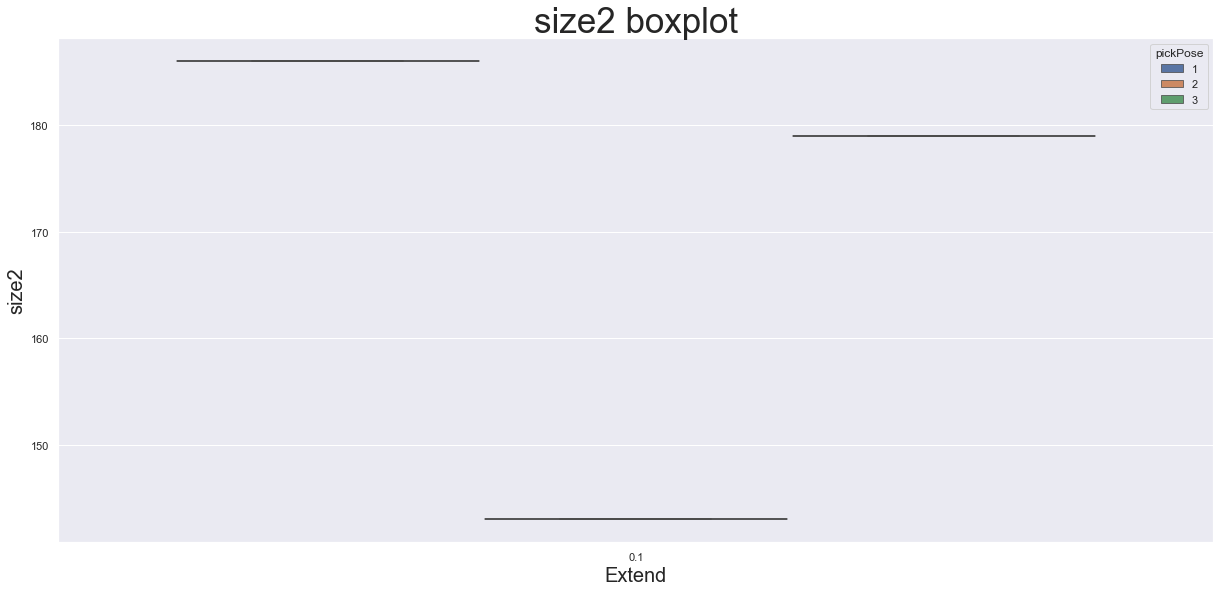

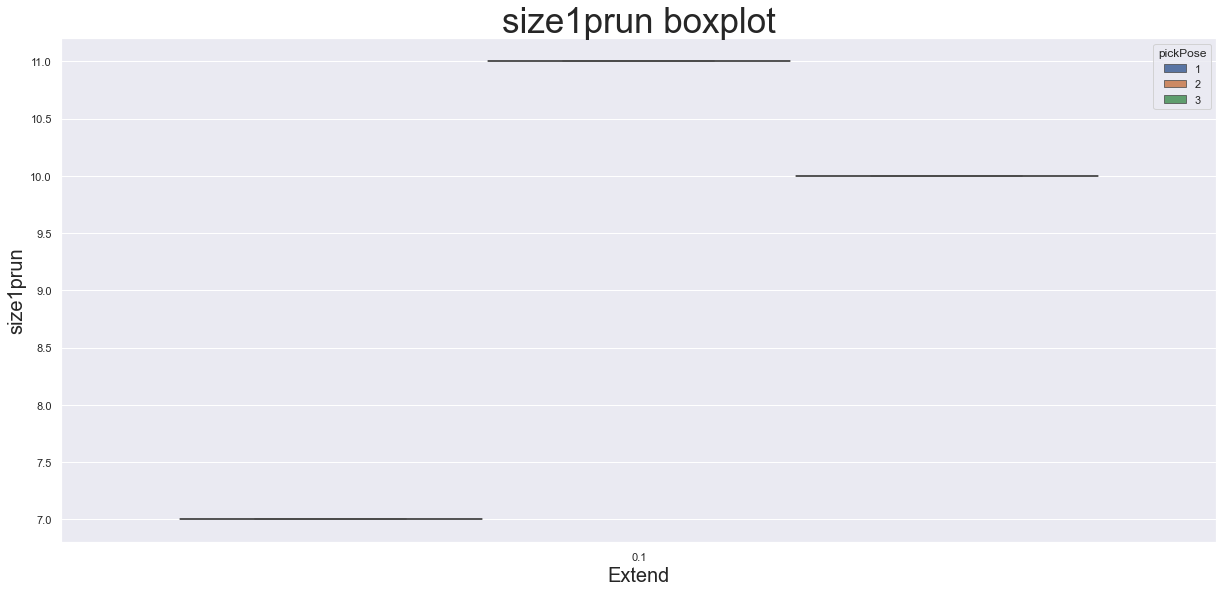

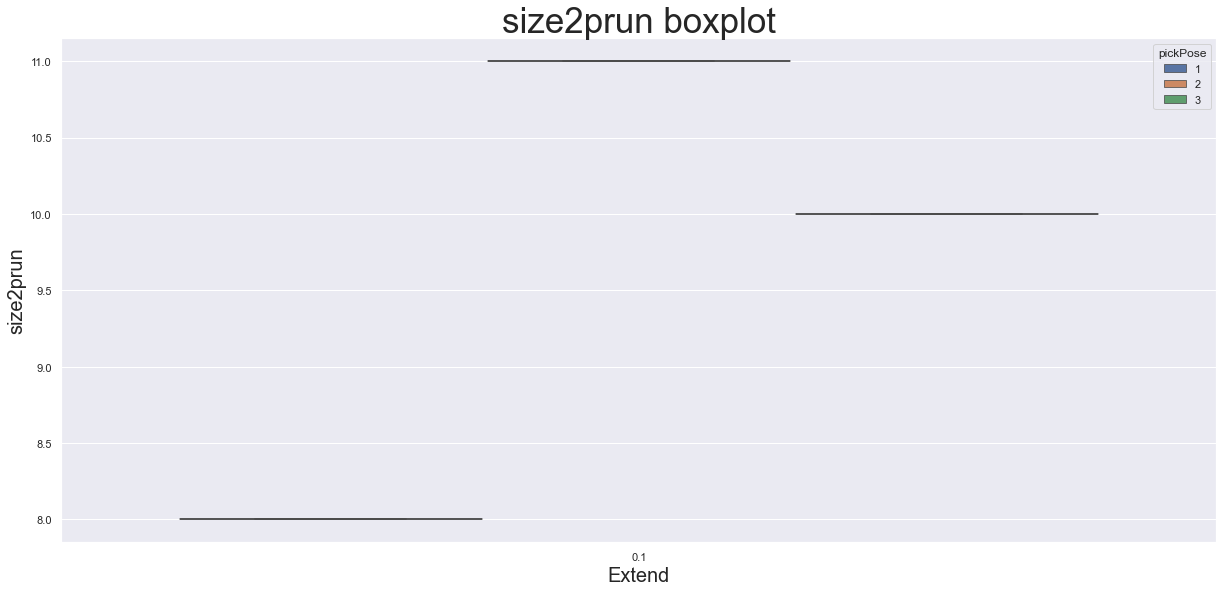

In [48]:
dataCols = ["totalTime","totalTimePrun","size1","size2","size1prun","size2prun"]

sns.set(rc={'figure.figsize':(20.7,9.27)})
for col in dataCols:
    data = df.loc[:,[col, "extend"]]
    plt.figure()
    fig = sns.boxplot(x = "extend", y = col, hue="pickPose", data=df)
    plt.xlabel("Extend", size=20)
    plt.ylabel(col, size=20)
    plt.title(col + " boxplot", size = 35)
    plt.savefig("../../results/figures/"+col+".png")